<a href="https://colab.research.google.com/github/fvillena/dcc-ia-nlp/blob/master/1-introduction.sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Estas son las bibliotecas y módulos necesarios.

In [2]:
import pandas as pd
import re

Descargamos los datos necesarios para las actividades

In [3]:
!wget https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/aysen_corto.csv
!wget https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/proveedoresA.txt
!wget https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/other_vhosts_access.log

--2022-11-14 17:40:02--  https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/aysen_corto.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4501 (4.4K) [text/plain]
Saving to: ‘aysen_corto.csv’

aysen_corto.csv     100%[===================>]   4.40K  --.-KB/s    in 0s      

2022-11-14 17:40:02 (54.8 MB/s) - ‘aysen_corto.csv’ saved [4501/4501]

--2022-11-14 17:40:02--  https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/proveedoresA.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5946 (5.8K) [text/

## Actividad 1: Lectura y parsing

1.   Utilizando la biblioteca Pandas, cargue el archivo `aysen_corto.csv` como un dataframe (revise los tipos de datos, cabecera y separador)
2.   Mantenga solo las columnas `sexo`, `comuna`, y `prestación`.
3.   Realice un conteo de los valores en de las columnas `sexo` y `comuna` y preséntelos en un gráfico.



In [4]:
# HINTS:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

# Prográmame

In [5]:
aysen_corto = pd.read_csv("aysen_corto.csv", sep=";", na_values=["Otro",""])

In [6]:
aysen_corto.head()

,FECHA_NAC,SEXO,PRESTA_MIN,PLANO,EXTREMIDAD,PRESTA_EST,F_ENTRADA,ESTAB_ORIG,ESTAB_DEST,F_SALIDA,C_SALIDA,E_OTOR_AT,PRESTA_MIN_SALIDA,REGION,COMUNA,SOSPECHA_DIAG
0,1985,2.0,09-001-0,NaN,NaN,ENDODONCIA,31-12-17,25-301,25-100,NaN,NaN,NaN,NaN,11.0,NaN,Celulitis y absceso de boca
1,1946,NaN,09-004-0,NaN,NaN,PERIODONCIA,31-12-17,25-301,25-100,NaN,NaN,NaN,NaN,NaN,11101.0,Periodontitis cronica
2,1937,2.0,09-006-0,NaN,NaN,REHABILITACION: PROTESIS REMOVIBLE,31-12-17,25-301,25-100,2018-01-03 00:00:00,1.0,25-100,09-006-0,11.0,11101.0,Otras afecciones especificadas de los dientes ...
3,1955,2.0,07-208-0,NaN,NaN,NEUROCIRUGIA,30-12-17,25-300,25-100,NaN,NaN,NaN,NaN,11.0,11101.0,"Trastornos de disco lumbar y otros, con radicu..."
4,1997,2.0,09-001-0,NaN,NaN,ENDODONCIA,30-12-17,25-301,25-100,NaN,NaN,NaN,NaN,11.0,11101.0,Celulitis y absceso de boca


In [7]:
aysen_corto_subset = aysen_corto[["SEXO","COMUNA","PRESTA_MIN"]]

In [8]:
aysen_corto_subset.head()

,SEXO,COMUNA,PRESTA_MIN
0,2.0,NaN,09-001-0
1,NaN,11101.0,09-004-0
2,2.0,11101.0,09-006-0
3,2.0,11101.0,07-208-0
4,2.0,11101.0,09-001-0


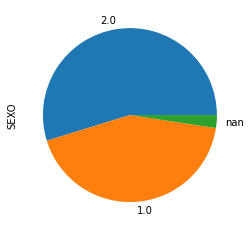

In [9]:
aysen_corto_subset.SEXO.value_counts(dropna=False).plot.pie()

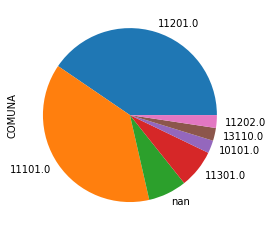

In [10]:
aysen_corto_subset.COMUNA.value_counts(dropna=False).plot.pie()

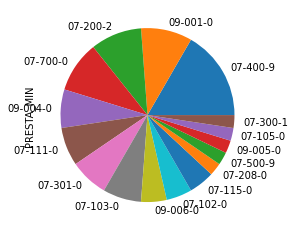

In [11]:
aysen_corto_subset.PRESTA_MIN.value_counts(dropna=False).plot.pie()

## Actividad 2: Expresiones regulares y Dataframes

El archivo `proveedoresA.txt` tiene lineas que presentan la siguiente estructura:

`PFZ-000000000001-001,Aspirinas 50 [mg] en paquetes de 25,200`

Cargue los datos en un dataframe e itere sobre el dataframe y para la primera columna utilice una expresión regular para separar los códigos e imprima sus partes, por ejemplo:

  `Parte 1: PFZ`

  `Parte 2: 000000000001`

  `Parte 3: 001`

El sitio web https://regexr.com/ es una buena interfaz para desarrollar expresiones regulares.

In [12]:
# HINT: df['X'].str.split(r'regex!', expand=True)

# Prográmame

In [13]:
proveedoresA = pd.read_csv("proveedoresA.txt",header=None)

In [14]:
proveedoresA.head()

,0,1,2
0,PFZ-000000000000-054,Ketoprofeno 500 mg en paquetes de 10,800
1,BAY-000000000001-056,Ketoprofeno 1000 mg en tiras de 10,800
2,PFZ-000000000002-026,Ibuprofeno 500 mg en tiras de 100,100
3,CHI-000000000003-078,Paracetamol 1000 mg en tiras de 50,800
4,RCH-000000000004-094,Ibuprofeno 50 mg en cajas de 25,10000


In [15]:
proveedoresA[0].str.extract(r"(\w{3})-(\d{12})-(\d{3})", expand=True)

,0,1,2
0,PFZ,000000000000,054
1,BAY,000000000001,056
2,PFZ,000000000002,026
3,CHI,000000000003,078
4,RCH,000000000004,094
...,...,...,...
95,RCH,000000000095,001
96,BAY,000000000096,030
97,BAY,000000000097,089
98,CHI,000000000098,083


In [16]:
for i,row in proveedoresA[0].str.split(r"(\w{3})-(\d{12})-(\d{3})", expand=True).iterrows():
  print(f"--- Columna {i}")
  print(f"Parte 1: {row[1]}")
  print(f"Parte 2: {row[2]}")
  print(f"Parte 3: {row[3]}")

--- Columna 0
Parte 1: PFZ
Parte 2: 000000000000
Parte 3: 054
--- Columna 1
Parte 1: BAY
Parte 2: 000000000001
Parte 3: 056
--- Columna 2
Parte 1: PFZ
Parte 2: 000000000002
Parte 3: 026
--- Columna 3
Parte 1: CHI
Parte 2: 000000000003
Parte 3: 078
--- Columna 4
Parte 1: RCH
Parte 2: 000000000004
Parte 3: 094
--- Columna 5
Parte 1: PFZ
Parte 2: 000000000005
Parte 3: 053
--- Columna 6
Parte 1: PFZ
Parte 2: 000000000006
Parte 3: 082
--- Columna 7
Parte 1: GSK
Parte 2: 000000000007
Parte 3: 031
--- Columna 8
Parte 1: RCH
Parte 2: 000000000008
Parte 3: 098
--- Columna 9
Parte 1: PFZ
Parte 2: 000000000009
Parte 3: 086
--- Columna 10
Parte 1: CHI
Parte 2: 000000000010
Parte 3: 042
--- Columna 11
Parte 1: CHI
Parte 2: 000000000011
Parte 3: 023
--- Columna 12
Parte 1: PFZ
Parte 2: 000000000012
Parte 3: 023
--- Columna 13
Parte 1: RCH
Parte 2: 000000000013
Parte 3: 030
--- Columna 14
Parte 1: BAY
Parte 2: 000000000014
Parte 3: 096
--- Columna 15
Parte 1: CHI
Parte 2: 000000000015
Parte 3: 058
--

## Actividad 3: Estudio de un log de acceso

El archivo `other_vhosts_access.log` contiene los registros de acceso a un servidor web, extraiga los IP desde donde se generan las visitas usando expresiones regulares en python. Con estas IP genere un archivo `.txt`, donde cada IP esta en una linea aparte. 
Con la lista de IP generada visualice en un mapa desde donde vienes las peticiones usando el sitio web https://www.showmyip.com/bulk-ip-lookup/, ¿cuántas visitas se originan desde rusia/ucrania/china/brasil?

In [17]:
# Prográmame

In [18]:
log = []
with open("other_vhosts_access.log", "r") as f:
  for line in f:
    log.append(line.strip())

In [19]:
with open("ips.txt", "w") as f:
  for entry in log:
    ip = re.search(".* (\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}).*",entry).group(1)
    print(ip)
    f.write(f"{ip}\n")

173.215.49.220
45.83.64.61
181.48.147.133
41.38.141.6
62.4.48.234
195.54.160.123
156.231.45.78
195.54.160.123
195.54.160.123
80.82.78.104
195.54.160.123
123.130.28.182
42.236.10.125
42.236.10.117
42.236.10.117
42.236.10.125
216.15.112.251
66.249.70.29
3.121.160.238
54.207.33.42
195.54.160.123
101.4.110.154
91.150.34.46
81.162.72.37
191.125.10.6
191.125.10.6
